<a href="https://colab.research.google.com/github/alberzenon/AprendizajeAutomatico/blob/main/Comparacion_K_Means_y_Fuzzy_C_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1l5Untzpjrp9yuDUCbVLjELVxQno7SdRy?usp=sharing


In [ ]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from fcmeans import FCM

In [ ]:
customer_data = pd.read_csv('shopping_data.csv')

In [ ]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.shape

(200, 5)

In [ ]:
data = customer_data.iloc[:, 3:5].values

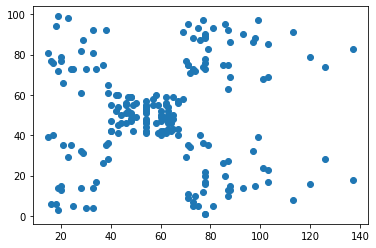

In [ ]:
# plot result
plt.scatter(data[:,0], data[:,1])
plt.show()

In [ ]:
#Creacion del modelo defieniendo los clusteres iniciales
fcm = FCM(n_clusters=5)

In [ ]:
#entrenamiento del modelo
fcm.fit(data)

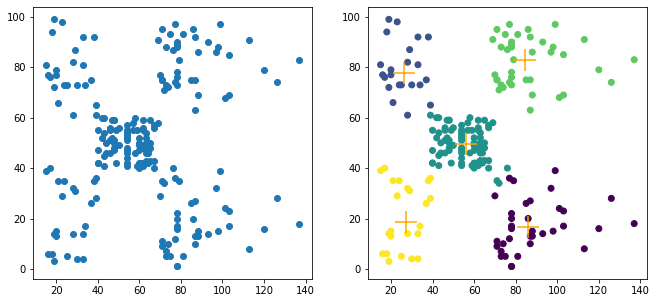

In [ ]:
#obtencion de los centroides y ejecucion de las predicciones
fcm_centers = fcm.centers
fcm_labels = fcm.predict(data)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(data[:,0], data[:,1])
axes[1].scatter(data[:,0], data[:,1], c=fcm_labels)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='orange')
plt.show()

In [ ]:
fcm_labels

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

## Problema resuelto con K-Means

In [ ]:
from sklearn.cluster import KMeans
modelo_kmeans = KMeans(n_clusters=5, n_init=25, random_state=123)
modelo_kmeans.fit(data)
y_predict = modelo_kmeans.predict(data)

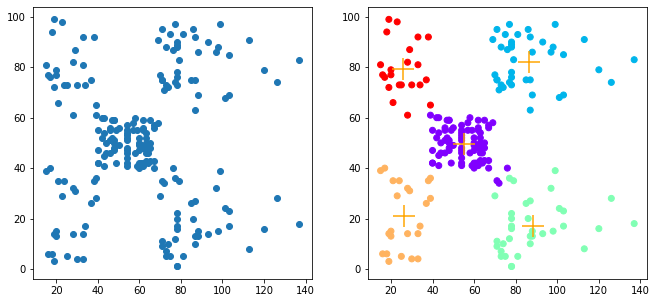

In [ ]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(data[:,0], data[:,1])
axes[1].scatter(data[:,0], data[:,1], c = modelo_kmeans.labels_, cmap='rainbow')
axes[1].scatter(modelo_kmeans.cluster_centers_[:,0], modelo_kmeans.cluster_centers_[:,1], marker="+", s=500, c='orange')
plt.show()

In [ ]:
print(fcm_centers)
print(modelo_kmeans.cluster_centers_)

[[86.12941239 16.74567496]
 [26.4540667  77.87385788]
 [56.25050107 49.58019273]
 [84.41417115 82.77088685]
 [27.05381613 18.58796764]]
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


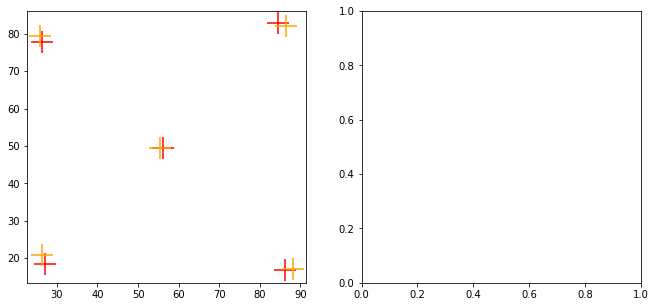

In [ ]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='red')
axes[0].scatter(modelo_kmeans.cluster_centers_[:,0], modelo_kmeans.cluster_centers_[:,1], marker="+", s=500, c='orange')
plt.show()

## Dendograma (Agrupamiento Jerárquico )

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
linked_complete = linkage(data, 'complete')

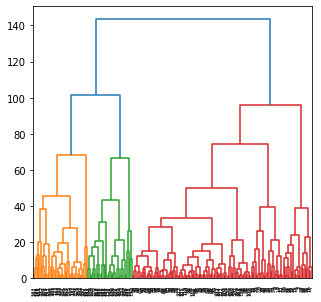

In [ ]:
plt.figure(figsize=(5, 5))
dendrogram(linked_complete,
  orientation='top',
    distance_sort='descending',
    show_leaf_counts=True)
plt.show()

## Cálculo del índice silhouette

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
rg_de_grupos= range(2,10)
val_silhouette = []

In [ ]:
for numero_clusters in rg_de_grupos:
 modelo = AgglomerativeClustering(
       affinity = 'euclidean',
       linkage = 'complete',
       n_clusters = numero_clusters
      )

 etiquetas_cluster = modelo.fit_predict(data)
 silhouette_avg = silhouette_score(data, etiquetas_cluster)
 val_silhouette.append(silhouette_avg)

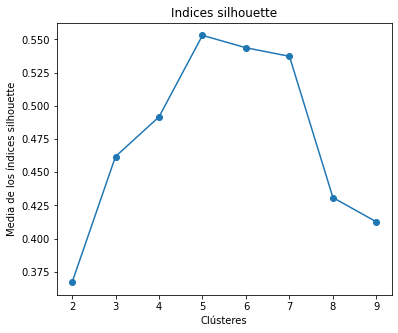

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(rg_de_grupos, val_silhouette, marker='o')
ax.set_title("Indices silhouette")
ax.set_xlabel('Clústeres')
ax.set_ylabel('Media de los índices silhouette');